In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
# from Experts.inceptionresnet import NNClassifier 
# from WSITools.wsi_analyzer import WSIAnalyzer
# from WSITools.wsi_generator import WSIGenerator
# from Utils.utils import eval_window_quality
# from Parsers.xml_parser import XMLParser

import json
import pickle

import matplotlib.pyplot as plt

In [31]:
path = 'backend/demo_slides/a02.pickle'
with (open(path, "rb")) as f:
    dump = pickle.load(f)
dump['analyses_classes_ordering'] = {
    'gt': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'],
     'inception_NormalVsAllNew': ['Normal', 'Damaged'], 
     'inceptionresnet_Multiclass3V2New': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inception_NormalVsAllNew_NewAnnot': ['Normal', 'Damaged'], 
     'inceptionresnet_Multiclass3V2New_NewAnnot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_Multiclass_handpicked': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_Multiclass_revisit_full_train': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_Multiclass_revisit': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_Multiclass_revisit_new_annot_full_train': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_Multiclass_revisit_new_annot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
     'inceptionresnet_4Class': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'], 
     'inceptionresnet_Multiclass_new_eval': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
     'weighingNew': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
     'weighingNew_NewAnnot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
     'weighingNew_handpicked': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
     'weighingWide': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
     'weighing4Class': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'],
     'weighing_new_eval': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'] 
}
with (open(path, 'wb')) as f:
    pickle.dump(dump, f, protocol=pickle.HIGHEST_PROTOCOL)
#     print(dump.keys(), dump['roots'][0]['children'][0]['children'][0]['children'][0]['children'][0]['children'][0]['analyses'].keys())

In [ ]:
{'gt': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'],
 'inception_NormalVsAllNew': ['Normal', 'Damaged'], 
 'inceptionresnet_Multiclass3V2New': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inception_NormalVsAllNew_NewAnnot': ['Normal', 'Damaged'], 
 'inceptionresnet_Multiclass3V2New_NewAnnot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_Multiclass_handpicked': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_Multiclass_revisit_full_train': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_Multiclass_revisit': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_Multiclass_revisit_new_annot_full_train': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_Multiclass_revisit_new_annot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'], 
 'inceptionresnet_4Class': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'], 
 'inceptionresnet_Multiclass_new_eval': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
 'weighingNew': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
 'weighingNew_NewAnnot': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
 'weighingNew_handpicked': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
 'weighingWide': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'],
 'weighing4Class': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ', 'Normal'],
 'weighing_new_eval': ['Invasive carcinoma', 'Benign', 'Carcinoma in situ'] 
}

In [3]:
import numpy as np
def generate_eval_batch(generator, num, batch_size):
    imgs = np.zeros((num*batch_size, 256, 256, 3), dtype=np.float64)
    labels = []
    for i, (im, lab) in enumerate(generator):
        if i >= num:
            break
        imgs[i*batch_size:i*batch_size+batch_size] = im
        labels.extend(lab)
    return imgs, np.array(labels)

In [27]:
train_wsis = []
train_annot = []
eval_wsis = []
eval_annot = []
wsis = ['A{:02d}.svs'.format(i) for i in range(2, 3)]
path = 'D:\\Diploma thesis\\DP_code\\Data\\old_annot\\'
for i, wsi in enumerate(wsis):
    if i == 1:
        pass
#         eval_wsis.append(path + wsi)
#         eval_annot.append(path + wsi.replace('svs', 'xml'))
#         print('eval: ', path + wsi)
    else:
        train_wsis.append(path + wsi)
        train_annot.append(path + wsi.replace('svs', 'xml'))
        print('train: ', path + wsi)
        
classes_contained=['Benign', 'Carcinoma in situ', 'Invasive carcinoma', 'Normal']
train_analyzers = [WSIAnalyzer(path_to_slide=wsi, \
                               annotation_parser=XMLParser(annot), \
                               classes_contained=classes_contained, \
                               bad_quality_function=eval_window_quality
                              ) for wsi, annot in zip(train_wsis, train_annot)]

train:  D:\Diploma thesis\DP_code\Data\old_annot\A02.svs


In [28]:
a = train_analyzers[0]

In [29]:
train_analyzers[0].cancer_types

['Normal', 'Carcinoma in situ', 'Benign', 'Invasive carcinoma']

In [30]:
a.assessments

,id,x_coord,y_coord,width,height,depth,type,quality,damaged_amount
0,0,0,0,8192,8192,0,Normal,OK,"{'Benign': 0.03562808036804199, 'Carcinoma in ..."
1,1,0,7243,8192,8192,0,Normal,OK,"{'Benign': 0.05949533036029016, 'Carcinoma in ..."
2,2,0,14486,8192,8192,0,Normal,OK,"{'Benign': 0.21670714486390352, 'Carcinoma in ..."
3,3,0,21729,8192,8192,0,Normal,Bad,"{'Benign': 0, 'Carcinoma in situ': 0, 'Invasiv..."
4,4,0,28972,8192,8192,0,Normal,Bad,"{'Benign': 0, 'Carcinoma in situ': 0, 'Invasiv..."
5,5,0,36215,8192,8192,0,Normal,Bad,"{'Benign': 0, 'Carcinoma in situ': 0, 'Invasiv..."
6,6,7443,0,8192,8192,0,Normal,OK,"{'Benign': 0, 'Carcinoma in situ': 0, 'Invasiv..."
7,7,7443,7243,8192,8192,0,Normal,OK,"{'Benign': 0.03131084144115448, 'Carcinoma in ..."
8,8,7443,14486,8192,8192,0,Normal,OK,"{'Benign': 0.13451671600341797, 'Carcinoma in ..."
9,9,7443,21729,8192,8192,0,Normal,OK,"{'Benign': 0.09471036524397053, 'Carcinoma in ..."


In [31]:
dct = {'Benign': 0, 'Carcinoma in situ': 0, 'Invasive carcinoma': 0, 'Normal': 0}
for rec in train_analyzers[0].assessments['damaged_amount']:
    for k, v in rec.items():
        dct[k] += v
dct

{'Benign': 1257.5779604783622,
 'Carcinoma in situ': 953.0117605663194,
 'Invasive carcinoma': 13948.94227416383,
 'Normal': 41170.46800479156}

In [32]:
from shapely.geometry import Polygon, box

In [33]:
a.wsi.level_dimensions

((54721, 46305), (13680, 11576), (3420, 2894))

In [34]:
a.regions['Invasive carcinoma']['region_vertices'][0]

array([[[29521, 10630]],

       [[29478, 10630]],

       [[29435, 10630]],

       ...,

       [[29650, 10673]],

       [[29607, 10716]],

       [[29521, 10630]]])

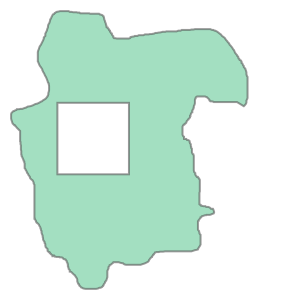

In [35]:
ox = 30000
oy = 20000
a.regions['Invasive carcinoma']['region_polygons'][0].difference(box(ox, oy, 8192 + ox, 8192 + oy))

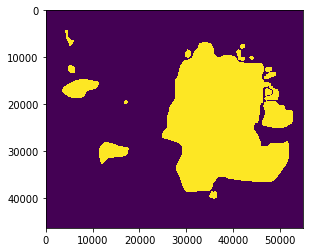

In [36]:
plt.imshow(a.create_mask_from_regions(a.wsi.level_dimensions[0][::-1]))

In [86]:
classes = {'Less': ['Benign', 'Carcinoma in situ', 'Normal'], 'More': ['Invasive carcinoma']}
# classes_to_set = {'Invasive carcinoma': 2, 'Benign': 0, 'Carcinoma in situ': 1}
train_generator = WSIGenerator(train_analyzers, 18, 256, None, range(0,6), classes, True)
# train_generator.set_classes(classes_to_set)

In [87]:
train_generator.analyzers_registrations

{'Less': {'analyzers': [0], 'next': 0}, 'More': {'analyzers': [0], 'next': 0}}

In [82]:
# nn_classifier = NNClassifier('test1', list(classes_to_set.keys()), (256, 256, 3), None)

In [90]:
train_generator.classes

{'Benign': 'Less',
 'Carcinoma in situ': 'Less',
 'Normal': 'Less',
 'Invasive carcinoma': 'More'}

In [92]:
a.classes

{'Benign': 'Less',
 'Carcinoma in situ': 'Less',
 'Normal': 'Less',
 'Invasive carcinoma': 'More'}

In [91]:
eval_data = train_generator.generate_eval_batch(10)

['Less', 'Less', 'Less', 'Less', 'Less', 'Less', 'Less', 'Less', 'Less', 'More', 'More', 'More', 'More', 'More', 'More', 'More', 'More', 'More']


KeyError: 'Less'

In [10]:
eval_data

(array([[[[0.77254902, 0.61960784, 0.7372549 ],
          [0.74117647, 0.54117647, 0.69019608],
          [0.78431373, 0.56470588, 0.72156863],
          ...,
          [0.80392157, 0.66666667, 0.76862745],
          [0.80392157, 0.67058824, 0.77647059],
          [0.74901961, 0.62745098, 0.74509804]],
 
         [[0.90980392, 0.81960784, 0.87843137],
          [0.78823529, 0.64313725, 0.74117647],
          [0.7254902 , 0.54901961, 0.66666667],
          ...,
          [0.89411765, 0.76470588, 0.8745098 ],
          [0.69019608, 0.57647059, 0.67058824],
          [0.91372549, 0.83137255, 0.90588235]],
 
         [[0.92156863, 0.85098039, 0.90196078],
          [0.9372549 , 0.82745098, 0.90196078],
          [0.89019608, 0.76862745, 0.85490196],
          ...,
          [0.80392157, 0.69019608, 0.79607843],
          [0.78431373, 0.69411765, 0.77647059],
          [0.85882353, 0.79607843, 0.85098039]],
 
         ...,
 
         [[0.89803922, 0.87843137, 0.90196078],
          [0.87450

In [21]:
train_generator.analyzers_registrations

{'Benign': {'analyzers': [0], 'next': 0},
 'Carcinoma in situ': {'analyzers': [0], 'next': 0},
 'Normal': {'analyzers': [0], 'next': 0},
 'Invasive carcinoma': {'analyzers': [0], 'next': 0}}